## hw03
### Q1 在数据集creditcard_exp中绘制，不同edu_class下，年龄和收入的关系图


In [1]:
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd

In [4]:
#读取数据
df = pd.read_csv('creditcard_exp.csv')
df.head(2)

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104168743,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.5,7.132098111,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2


In [5]:
df['edu_class'].value_counts()

1    37
2    23
3    22
0    18
Name: edu_class, dtype: int64

In [10]:
df = df.sort_values('Age')

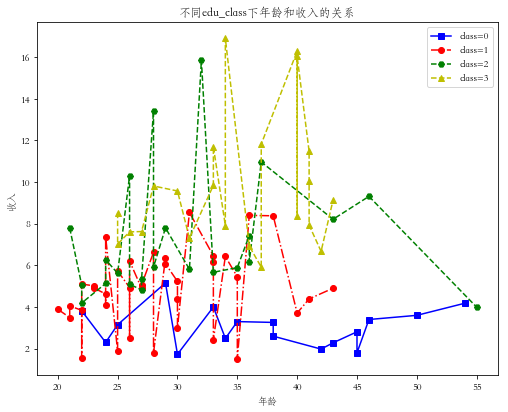

In [15]:
# # # 不同类别
fig =plt.figure(figsize=(8,7)) # 创建画布
ax = fig.add_axes([0.15,0.2,0.8,0.7]) # Axes是画布上的绘图区域
plt.plot(df[df['edu_class']==0]['Age'],df[df['edu_class']==0]['Income'],'bs-',
       df[df['edu_class']==1]['Age'],df[df['edu_class']==1]['Income'],'ro-.',
       df[df['edu_class']==2]['Age'],df[df['edu_class']==2]['Income'],'gH--',
        df[df['edu_class']==3]['Age'],df[df['edu_class']==3]['Income'],'y^--')## 绘制折线图
plt.xlabel('年龄')## 添加横轴标签
plt.ylabel('收入')## 添加y轴名称
plt.title('不同edu_class下年龄和收入的关系')## 添加图表标题
plt.legend(['class=0','class=1','class=2','class=3'])
plt.show()

### Q2 在titanic_train数据中，绘制不同仓位等级(Pclass)下，游客生还和未生还的情况，请分别使用堆叠柱状图，百分比堆叠柱状图垂直交错柱状图来展示。

In [14]:
#读取数据
Titanic = pd.read_csv('titanic_train.csv')
Titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [17]:
import numpy as np

In [21]:
Titanic['tt'] = 1

In [24]:
temp = pd.crosstab(Titanic['Pclass'],Titanic['Survived'],values=Titanic['tt'],aggfunc=np.sum)
temp

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


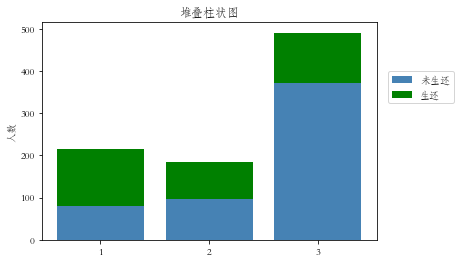

In [27]:
plt.bar(x= temp.index.values,height= temp.iloc[:, 0],color='steelblue',label='未生还',tick_label = temp.index.values)
plt.bar(x= temp.index.values,height= temp.iloc[:, 1],bottom =temp.iloc[:, 0], color='green',label='生还',
        tick_label = temp.index.values)
plt.ylabel('人数')
plt.title('堆叠柱状图')
plt.legend(loc=2, bbox_to_anchor=(1.02,0.8)) #图例显示在外面
plt.show()

In [28]:
temp = temp.div(temp.sum(1).astype(float), axis=0)

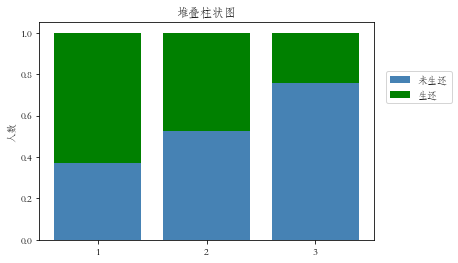

In [29]:
# # # 堆叠图占比
plt.bar(x= temp.index.values,height= temp.iloc[:, 0],color='steelblue',label='未生还',tick_label = temp.index.values)
plt.bar(x= temp.index.values,height= temp.iloc[:, 1],bottom =temp.iloc[:, 0], color='green',label='生还',
        tick_label = temp.index.values)
plt.ylabel('人数')
plt.title('堆叠柱状图')
plt.legend(loc=2, bbox_to_anchor=(1.02,0.8)) #图例显示在外面
plt.show()

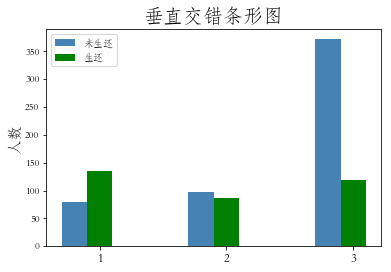

In [32]:
# # # 垂直交错条形图
temp = pd.crosstab(Titanic['Pclass'],Titanic['Survived'],values=Titanic['tt'],aggfunc=np.sum)
bar_width = 0.2 #设置宽度
pclass = temp.index.values #取出季度名称
plt.bar(x= np.arange(0,3),height= temp.iloc[:, 0],color='steelblue',label='未生还',width = bar_width)
plt.bar(x= np.arange(0,3) + bar_width,height= temp.iloc[:, 1], color='green',label='生还',width=bar_width)
plt.xticks(np.arange(3)+0.2,pclass,fontsize=12)
plt.ylabel('人数',fontsize=15)
plt.title('垂直交错条形图',fontsize=20)
plt.legend(loc = 'upper left')
plt.show()